In [1]:
import numpy as np
import os
from skimage.measure import block_reduce
from scipy.misc import imread
import matplotlib.pylab as plt
import cPickle as pkl
import scipy.signal
import numpy.fft as fft
import sys

from libtiff import TIFF

%matplotlib inline


In [2]:
sampling_rate = 60.0
reduce_factor = (4, 4)
cache_file = True
target_freq = 0.08
im_format = '.png'

In [3]:
# imdir = sys.argv[1]
imdir = '/media/juliana/MAC/data/JR009/20150625_block2/20150625_JR009_500um_0080Hz_blueLED'

condlist_ = ['Left', 'Right', 'Up', 'Down']
runs = os.listdir(imdir)
runs = [i for i in runs if any(word in i for word in condlist_) and os.path.isdir(os.path.join(imdir,i))]

print runs

['H-Down_0', 'H-Up_0', 'V-Left_0', 'V-Right_0']


In [4]:
# for run in runs:

run = runs[2]
curr_cond_type = run.split('_')[0]
curr_run_number = run.split('_')[1]
curr_dir = os.path.join(imdir, run)

files = os.listdir(curr_dir)
files = [f for f in files if os.path.splitext(f)[1] == im_format]

print len(files)

14980


float64 (246, 328)
max, min:  [4095.0, 973.0]
float64 (62, 82)
max, min:  [4095.0, 1000.8125]


<matplotlib.colorbar.Colorbar instance at 0x7fe8a917fa28>

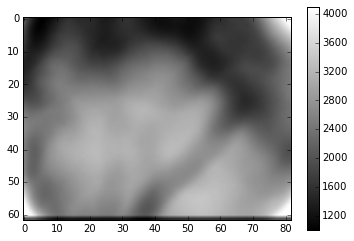

In [5]:
tiff = TIFF.open(os.path.join(curr_dir, files[0]), mode='r')
sample = tiff.read_image().astype('float')
print sample.dtype, sample.shape
print "max, min: ", [sample.max(), sample.min()]
tiff.close()

sample = block_reduce(sample, (4, 4), func=np.mean)
print sample.dtype, sample.shape
print "max, min: ", [sample.max(), sample.min()]
plt.imshow(sample, cmap='gray')
plt.colorbar()

In [7]:
cos_im = np.zeros((sample.shape[0], sample.shape[1]), dtype='float')
sin_im = np.zeros((sample.shape[0], sample.shape[1]), dtype='float')
len_im = np.zeros((sample.shape[0], sample.shape[1]), dtype='float')

n_images = len(files)

t = np.arange(0, n_images/sampling_rate, 1.0/sampling_rate)
print n_images/sampling_rate

sin_ref = np.sin(2 * np.pi * t * target_freq )
cos_ref = np.cos(2 * np.pi * t * target_freq )

# references waves should be offset by pi/2

249.666666667


NameError: name 'y' is not defined

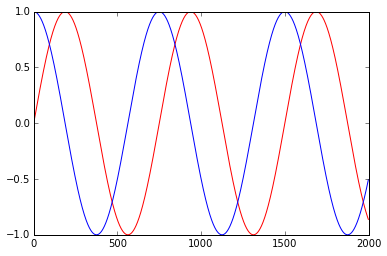

In [8]:
fig = plt.figure()
# fig.add_subplot(1,2,1)
plt.plot(sin_ref[0:2000], 'r')
plt.plot(cos_ref[0:2000], 'b')
print y[0:10]

In [9]:
# Get average frame:

print('copying files')

stack = np.empty((sample.shape[0], sample.shape[1], len(files)))

for i, f in enumerate(files):

#     if i % 100 == 0:
#         print('%d images processed...' % i)
    tiff = TIFF.open(os.path.join(curr_dir, f), mode='r')
    im = tiff.read_image().astype('float')
    tiff.close()

    im_reduced = block_reduce(im, reduce_factor, func=np.mean)
    stack[:, :, i] = im_reduced

average_frame = np.mean(stack, axis=2) # Take average across time
# del stack


copying files


<matplotlib.colorbar.Colorbar instance at 0x7f1fca765a28>

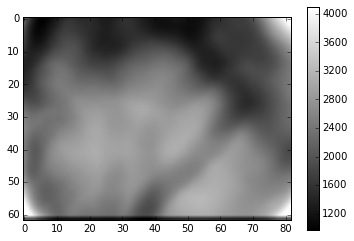

In [75]:
# Average frame:
plt.imshow(average_frame, cmap='gray')
plt.colorbar()
plt.title('average frame')

38418.0725806


<matplotlib.colorbar.Colorbar instance at 0x7fe8844fb170>

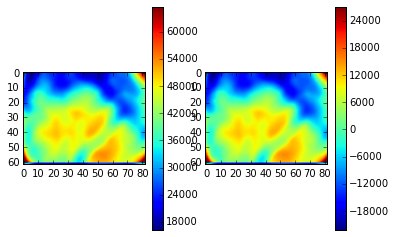

In [14]:
# OR, get "reference" frame from middle of stack?

tiff = TIFF.open(os.path.join(curr_dir, files[n_images/2]), mode='r')
ref_im = tiff.read_image().astype('float')
tiff.close()
ref_im_reduced = block_reduce(ref_im, reduce_factor, func=np.mean)
ref_im_reduced = block_reduce(ref_im, reduce_factor)

mean_pix_ref = np.mean(ref_im_reduced.ravel())
print mean_pix_ref

ref_im_reduced_mean = ref_im_reduced - np.mean(ref_im_reduced.ravel())

fig = plt.figure()

fig.add_subplot(1,2,1)
plt.imshow(ref_im_reduced)
plt.colorbar()

fig.add_subplot(1,2,2)
plt.imshow(ref_im_reduced_mean)
plt.colorbar()

In [ ]:
ref_im_reduced_meansub = ref_im_reduced - np.mean(ref_im_reduced.ravel())

fig = plt.figure()
fig.add_subplot(1,3,1)
plt.imshow(ref_im_reduced)
plt.title('middle frame')
plt.colorbar()

fig.add_subplot(1,3,2)
plt.imshow(ref_im_reduced_meansub)
plt.title('middle frame, mean pixel subtracted')
plt.colorbar()

fig.add_subplot(1,3,3)
plt.imshow(average_frame)
plt.title('average frame')
plt.colorbar()


<matplotlib.colorbar.Colorbar instance at 0x7f1fc97abd40>

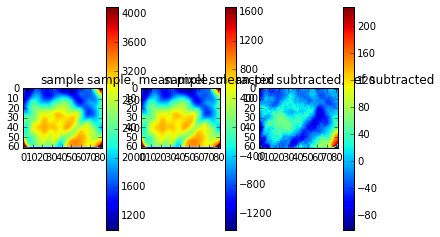

In [84]:
# MEAN SUB or REF SUB? 

# sample_meansub = sample - np.mean(sample.ravel())
# sample_meansub_refsub = sample_meansub - ref_im_reduced_meansub

# fig = plt.figure()
# fig.add_subplot(1,3,1)
# plt.imshow(sample)
# plt.title('sample')
# plt.colorbar()

# fig.add_subplot(1,3,2)
# plt.imshow(sample_meansub)
# plt.title('sample, mean pixel subtracted')
# plt.colorbar()

# fig.add_subplot(1,3,3)
# plt.imshow(sample_meansub_refsub)
# plt.title('sample, mean-pix subtracted, ref subtracted')
# plt.colorbar()


In [26]:
tiff = TIFF.open(os.path.join(curr_dir, files[n_images/2]), mode='r')
ref_im = tiff.read_image().astype('float')
tiff.close()
ref_im_reduced = block_reduce(ref_im, reduce_factor, func=np.mean)
# ref_im_reduced = block_reduce(ref_im, reduce_factor)
ref_im_reduced -= np.mean(ref_im_reduced.ravel())

for i, f in enumerate(files):

	# if i > 20:
	# 	break

# 	if i % 100 == 0:
# 		print('%d images processed...' % i)
	#im = imread(os.path.join(imdir, f)).astype('float')
	#im = im[20:230,40:275] # CROP
	tiff = TIFF.open(os.path.join(curr_dir, f), mode='r')
	im = tiff.read_image().astype('float')
	tiff.close()

	im_reduced = block_reduce(im, reduce_factor, func=np.mean)

	im_reduced -= np.mean(im_reduced.ravel())
# 	im_reduced -= ref_im_reduced
	im_reduced -= np.mean(average_frame.ravel())


	len_im += im_reduced**2 # full-wave rectifying (make all values positive)
	cos_im += cos_ref[i] * im_reduced # R(t) = Acos(2πft)
	sin_im += sin_ref[i] * im_reduced


In [29]:
norm_im = np.sqrt(len_im)

# cos_im /= norm_im
# sin_im /= norm_im

print cos_im

mag_map = np.sqrt(cos_im**2 + sin_im**2)
phase_map = np.arctan2(cos_im, sin_im)
# phase_map = np.arctan2(sin_im, cos_im)


[[ 107717.90404285  118704.94871871  124665.99259066 ...,   65619.67333468
    67856.98869794   67905.41377608]
 [ 111330.36310496  121615.35837995  128355.45394346 ...,   67978.97069029
    65388.63840381   67901.18782145]
 [ 114704.27556653  123166.74270356  127887.32947259 ...,   70414.21831075
    69242.19473705   66553.24850503]
 ..., 
 [  67905.41377608   67778.33284966   87942.42279903 ...,   50883.72188612
    67644.68725884   67905.41377608]
 [  67905.41377608   67905.41377608   70093.90598955 ...,   67441.37461388
    67905.41377608   67905.41377608]
 [ 108649.53878107  108649.53878107  108649.53878107 ...,  108649.53878107
   108649.53878107  108649.53878107]]


<matplotlib.colorbar.Colorbar instance at 0x7fe880f0bef0>

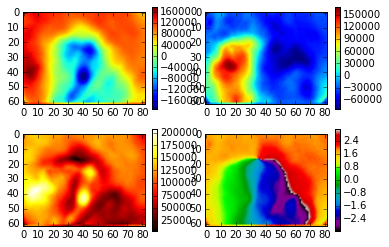

In [30]:
plt.subplot(2, 2, 1)
plot = plt.imshow(cos_im)
plt.colorbar()

plt.subplot(2, 2, 2)
plot = plt.imshow(sin_im)
plt.colorbar()


plt.subplot(2, 2, 3)
plot = plt.imshow(mag_map)
plot.set_cmap('hot')
plt.colorbar()

plt.subplot(2, 2, 4)
plot = plt.imshow(phase_map)
plot.set_cmap('spectral')
plt.colorbar()
